<a href="https://colab.research.google.com/github/sathasivamn/DECISION-TREE/blob/main/Assignment_13_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DECISION TREE
## 1. Data Preparation
## 2. Exploratory Data Analysis (EDA)
## 3. Feature Engineering
## 4. Decision Tree Classification
## 5. Hyperparameter Tuning
## 6. Feature Importance and Final Analysis
## 7. Interview Questions

# 1. Data Preparation
#### a. Importing required libraries
#### b. Loading the dataset
#### c. Displaying a few rows

In [62]:
# 1. Data Preparation
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [63]:
# Load dataset from Excel (use the correct sheet)
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [64]:
# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA)
#### a. Finding the Basic Info
#### b. Getting Summary stats
#### c. Applying Histograms
#### d. Applying Correlation Matrix
#### e. Applying Boxplots

In [65]:
# 2. Exploratory Data Analysis (EDA)

# Basic Info
print("Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int

In [66]:
# Summary stats
print("\nDescriptive Stats:")
print(df.describe())


Descriptive Stats:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


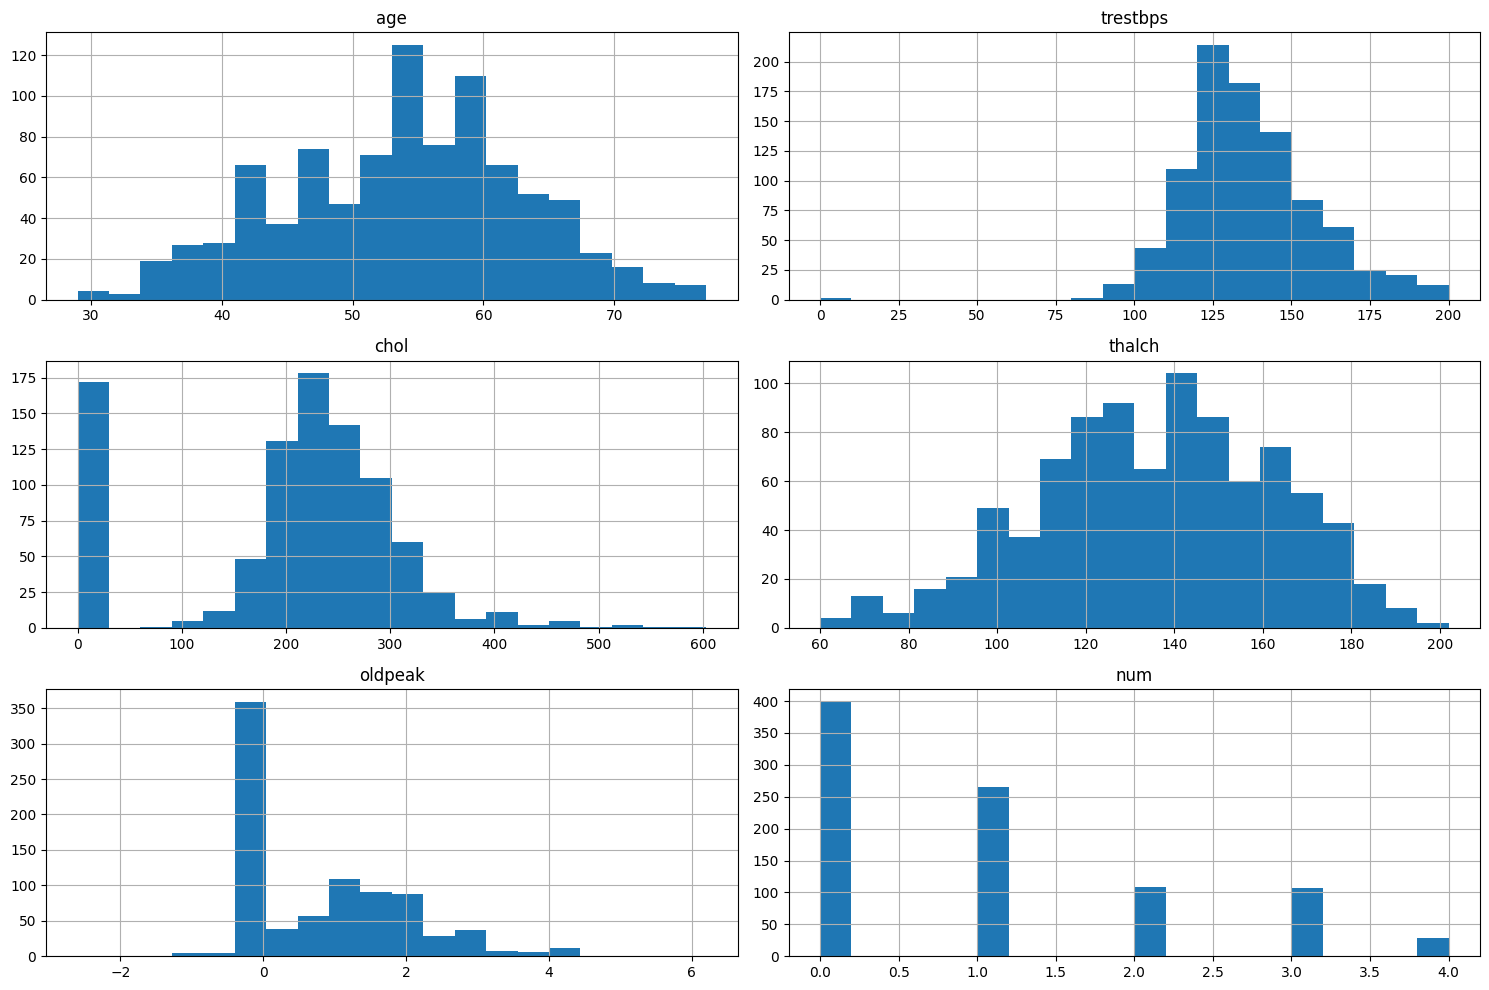

In [67]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

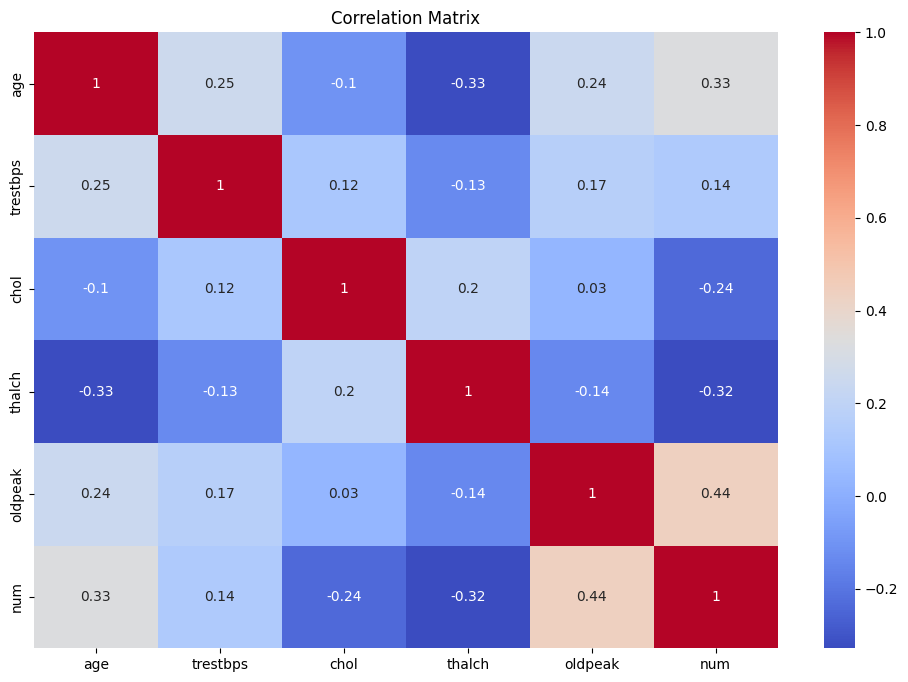

In [68]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

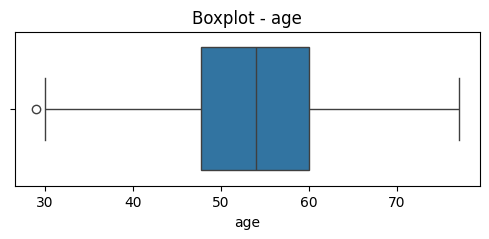

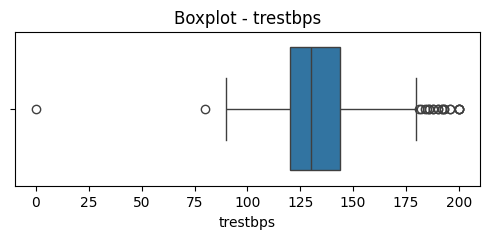

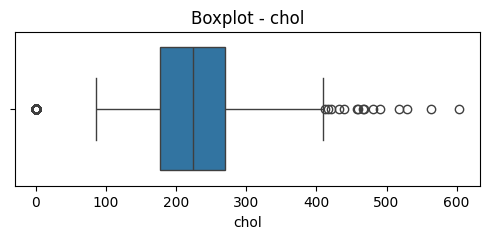

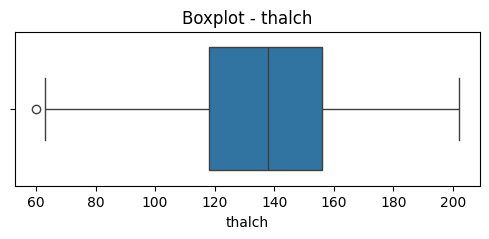

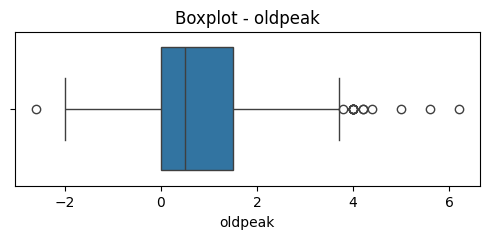

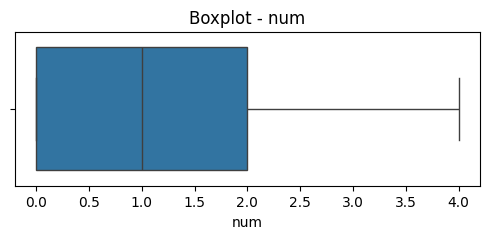

In [69]:
# Boxplots
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot - {column}')
    plt.show()

# 3. Feature Engineering
#### a. Droping rows with missing values
#### b. Defining features and target

In [70]:
# 3. Feature Engineering
# Drop rows with missing values
df = df.dropna()

# Encode target if it's not numeric (assuming 'target' is the label column)
# You can uncomment the following if needed:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['target'] = le.fit_transform(df['target'])

# **Check if 'target' column exists. If not, find the correct column name**
if 'target' not in df.columns:
    # Print available columns to identify the correct target column name
    print(df.columns)
    # **Replace 'correct_target_column_name' with the actual name from the output above**
    # Assuming 'num' is your target column based on global variables
    target_column_name = 'num'  # Changed to 'num' based on global variables
else:
    target_column_name = 'target'

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [71]:
# Before defining features and target, perform one-hot encoding
for column in df.select_dtypes(include=['object']).columns:
    # Create dummy variables for categorical columns
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)

    # Concatenate dummy variables to the DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Drop the original categorical column
    df = df.drop(column, axis=1)

# Define features and target after one-hot encoding
X = df.drop(target_column_name, axis=1)  # Use the identified target column name
y = df[target_column_name]              # Use the identified target column name

# 4. Decision Tree Classification
#### a. Applying Train-test split
#### b. Initialize and train model
#### c. Predict and Evaluate
#### d. Visualizing the decision tree

In [72]:
# 4. Decision Tree Classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize and train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Predict
y_pred = dt.predict(X_test)

In [75]:
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Use predict_proba to get probabilities for all classes
y_probs = dt.predict_proba(X_test)  # Get probabilities for all classes
# Calculate ROC AUC using 'ovr' for multi-class
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs, multi_class='ovr'))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        80
           1       0.33      0.51      0.40        41
           2       0.17      0.21      0.19        14
           3       0.33      0.11      0.17        27
           4       0.50      0.25      0.33         8

    accuracy                           0.48       170
   macro avg       0.41      0.35      0.35       170
weighted avg       0.50      0.48      0.48       170

Confusion Matrix:
[[53 23  2  2  0]
 [14 21  5  1  0]
 [ 3  6  3  1  1]
 [ 4 13  6  3  1]
 [ 1  1  2  2  2]]
Accuracy Score: 0.4823529411764706
ROC-AUC Score: 0.6021856602446033


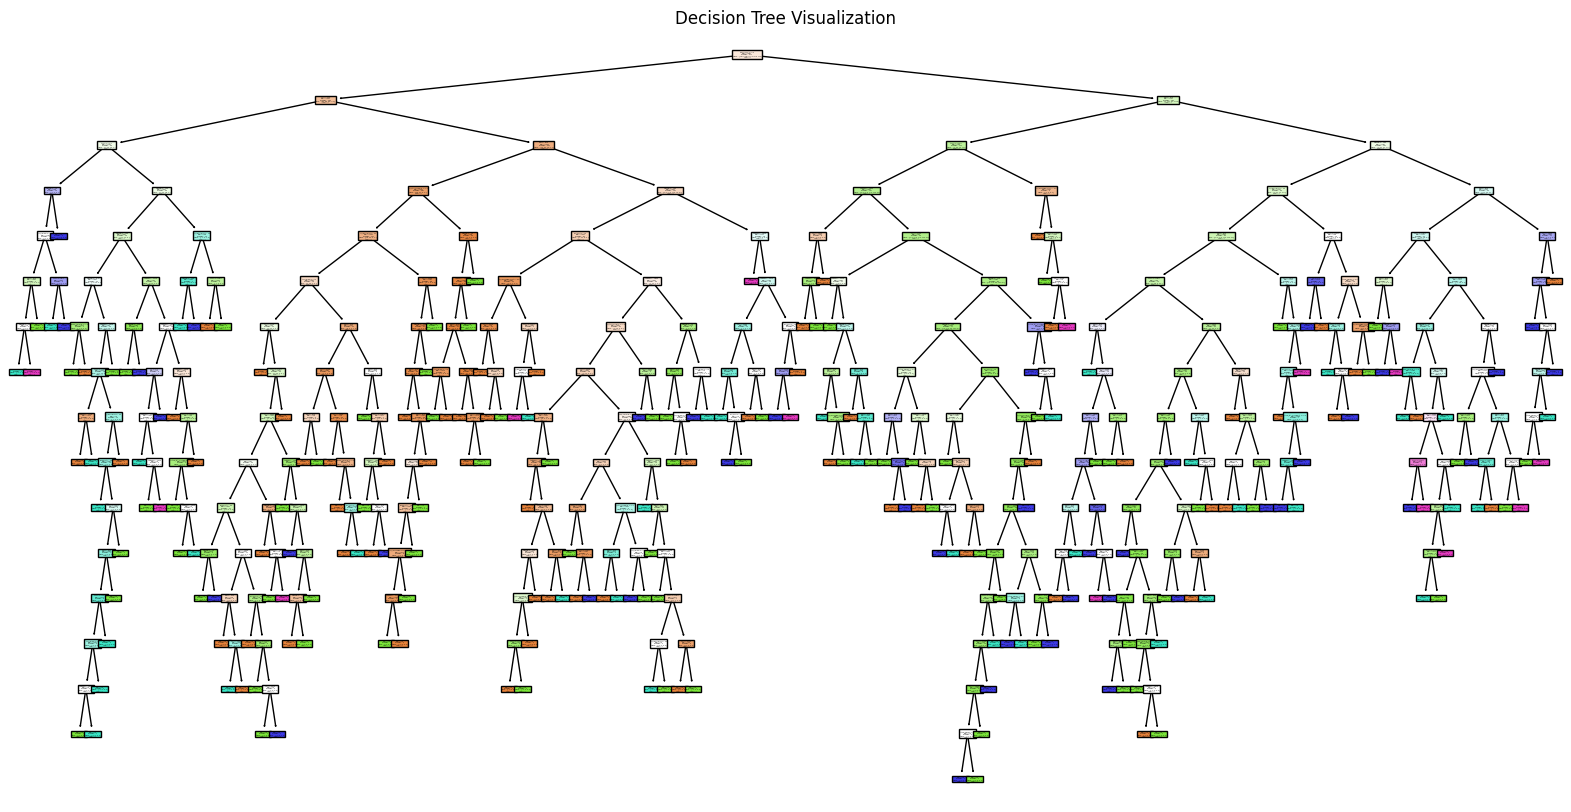

In [76]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))

# Get unique class labels from y_train (or y)
class_names = [str(c) for c in np.unique(y_train)] #y_train contains the actual values

plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 5. Hyperparameter Tuning
#### a. Applying Best model
#### b. Evaluation of Best Model


In [77]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [78]:
# Best model
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [79]:
# Evaluation of Best Model
print("\nEvaluation of Best Model:")
print(classification_report(y_test, best_preds))
print("Accuracy Score:", accuracy_score(y_test, best_preds))

# Get probability estimates for ROC AUC calculation
y_probs = best_model.predict_proba(X_test)

# Calculate ROC AUC using 'ovr' for multi-class
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs, multi_class='ovr'))


Evaluation of Best Model:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        80
           1       0.37      0.66      0.47        41
           2       0.14      0.07      0.10        14
           3       0.50      0.04      0.07        27
           4       0.00      0.00      0.00         8

    accuracy                           0.56       170
   macro avg       0.35      0.32      0.29       170
weighted avg       0.54      0.56      0.51       170

Accuracy Score: 0.5647058823529412
ROC-AUC Score: 0.7767864037585629


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6. Feature Importance and Final Analysis

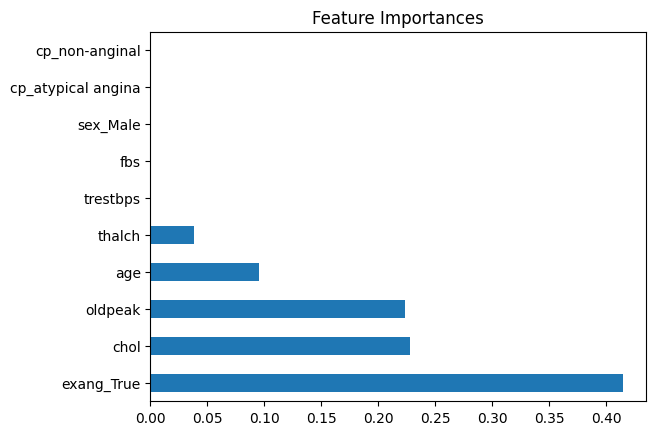

In [80]:
# 6. Feature Importance and Final Analysis
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()

# 7. Interview Questions - Answers
### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#### - max_depth: Limits the depth of the tree to avoid overfitting.
#### - min_samples_split: The minimum number of samples required to split an internal node. Higher values = simpler trees.
#### - min_samples_leaf: The minimum number of samples required to be at a leaf node. Helps smooth the model.
#### - criterion: Metric to measure the quality of a split — either 'gini' (default) or 'entropy'.

### 2. What is the difference between Label Encoding and One-hot Encoding?
#### - Label Encoding: Converts categorical values to integers (e.g., Red=0, Green=1). Useful for ordinal data but may introduce unintended hierarchy.
#### - One-hot Encoding: Converts categories into binary vectors (e.g., [0,1,0]). Preferred for nominal data to avoid implying order.